In [1]:
# Load modules necessary
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, filtfilt

# %matplotlib qt
%matplotlib ipympl

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


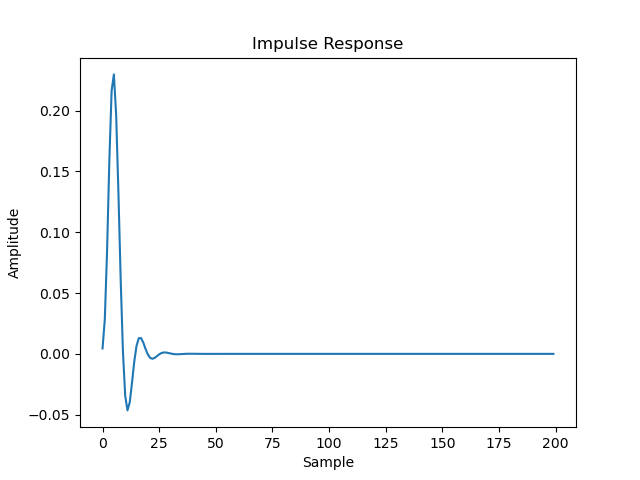

In [2]:
## Butterworth filter

# Sample time series data
fs = 1024  # Sampling frequency (Hz)

# Design a low-pass Butterworth IIR filter
order = 4  # Filter order
cutoff = 100  # Cutoff frequency (Hz)
b, a = butter(order, cutoff / (fs / 2), btype='low')

# Generate an impulse function
impulseX = np.concatenate([[1], np.zeros(199)])

# Filter the impulse function
impulse_response = lfilter(b, a, impulseX)

# Plot the impulse response
plt.figure()
plt.plot(impulse_response)
plt.title('Impulse Response')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

## SHOW THAT IT DOESN't go to zero!

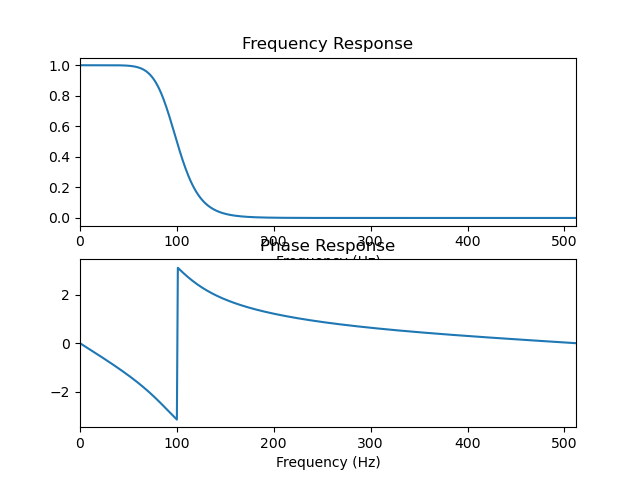

In [3]:
# Compute the frequency response using DFT
N = 1024
H = np.fft.fft(impulse_response, N)

# Plot the magnitude response
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(np.arange(N), np.abs(H)**2)
plt.xlim([0, 512])  # Nyquist
plt.title('Frequency Response')
plt.xlabel('Frequency (Hz)')

# Compute and plot the phase response
plt.subplot(2, 1, 2)
plt.plot(np.arange(N), np.angle(H))
plt.xlim([0, 512])  # Nyquist
plt.title('Phase Response')
plt.xlabel('Frequency (Hz)')

plt.show()

# Note: mention the discontinuity!

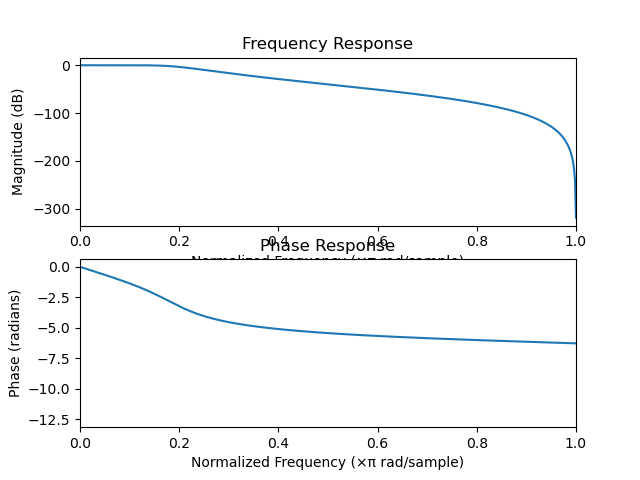

In [4]:
# Normalizations

# Frequency vector w = 2*pi*f
w = 2 * np.pi * np.arange(N) / N

# Compute power in decibel
decibel_power = 20 * np.log10(np.abs(H))

# Plot the magnitude response
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(w / np.pi, decibel_power)
plt.title('Frequency Response')
plt.xlabel('Normalized Frequency (×π rad/sample)')
plt.ylabel('Magnitude (dB)')
plt.xlim([0, 1])

# Plot the phase response
plt.subplot(2, 1, 2)
plt.plot(w / np.pi, np.unwrap(np.angle(H)))
plt.xlabel('Normalized Frequency (×π rad/sample)')
plt.ylabel('Phase (radians)')
plt.title('Phase Response')
plt.xlim([0, 1])

plt.show()

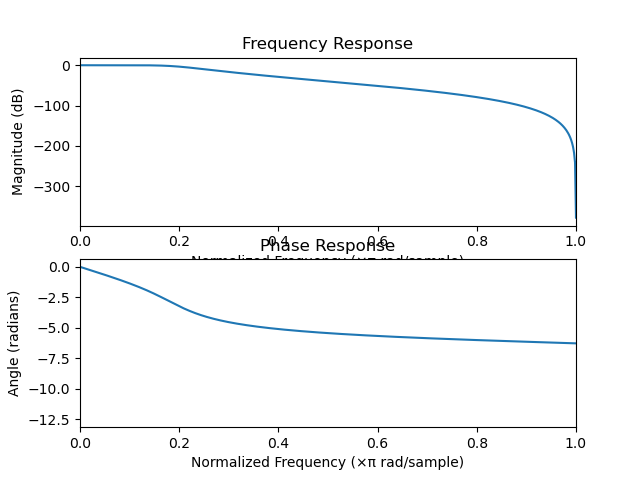

In [5]:
## using freqz and computing phase response
from scipy.signal import freqz

# Compute the frequency response
w, H2 = freqz(b, a, worN=fs, whole=True)

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(w / np.pi, 20 * np.log10(np.abs(H2)))
plt.title('Frequency Response')
plt.xlabel('Normalized Frequency (×π rad/sample)')
plt.ylabel('Magnitude (dB)')
plt.xlim([0, 1])

# Compute the phase response
PHI = np.unwrap(np.angle(H2))

plt.subplot(2, 1, 2)
plt.plot(w / np.pi, PHI)
plt.title('Phase Response')
plt.xlabel('Normalized Frequency (×π rad/sample)')
plt.ylabel('Angle (radians)')
plt.xlim([0, 1])

plt.show()

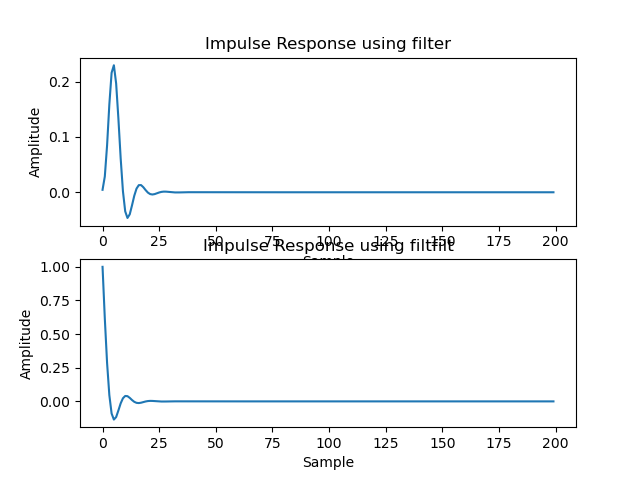

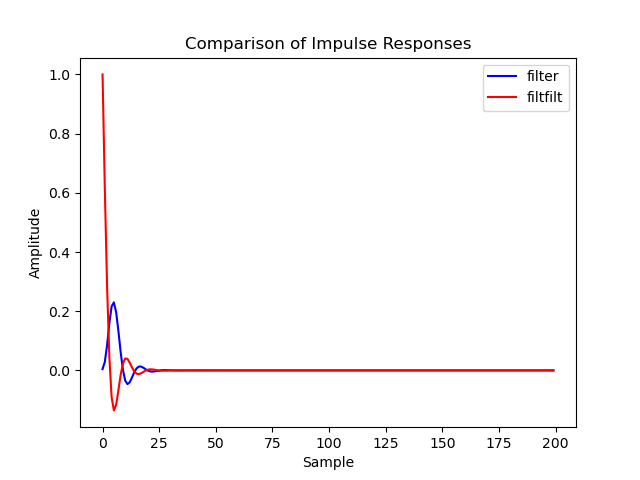

In [6]:
# Filter the impulse function using filtfilt
impulse_response_filtfilt = filtfilt(b, a, impulseX)

# Plot the impulse responses
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(impulse_response)
plt.title('Impulse Response using filter')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(impulse_response_filtfilt)
plt.title('Impulse Response using filtfilt')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.show()

# Show that the filtfilt response does not shift in time
plt.figure()
plt.plot(impulse_response, 'b', label='filter')
plt.plot(impulse_response_filtfilt, 'r', label='filtfilt')
plt.title('Comparison of Impulse Responses')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

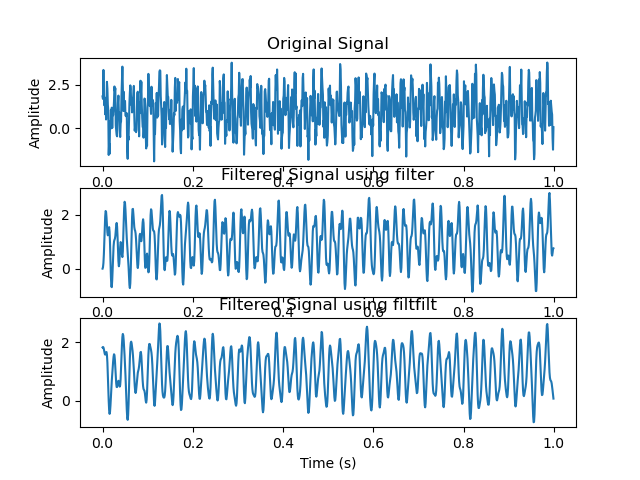

In [7]:
## Filter a signal 
N = 1024 # Number of points for DFT
x = np.arange(0, N) / fs # Time vector

signal = np.sin(2 * np.pi * 50 * x) + np.sin(2 * np.pi * 120 * x) + 2 * np.random.rand(len(x)) # Sample signal with two frequencies (50 Hz and 120 Hz)

# Apply the IIR filter to the signal
y = lfilter(b, a, signal)

# Apply the filtfilt function to the signal
y_filtfilt = filtfilt(b, a, signal)

# Plot the original and filtered signals
plt.figure()
plt.subplot(3, 1, 1)
plt.plot(x, signal)
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
plt.plot(x, y)
plt.title('Filtered Signal using filter')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 3)
plt.plot(x, y_filtfilt)
plt.title('Filtered Signal using filtfilt')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.show()

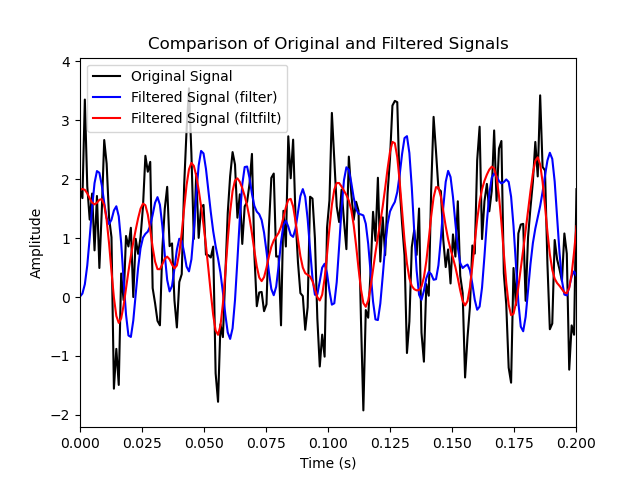

In [8]:
# Plot the original and filtered signals on top of each other
plt.figure()
plt.plot(x, signal, 'k', label='Original Signal')  # Original signal in black
plt.plot(x, y, 'b', label='Filtered Signal (filter)')  # Filtered signal using filter in blue
plt.plot(x, y_filtfilt, 'r', label='Filtered Signal (filtfilt)')  # Filtered signal using filtfilt in red
plt.title('Comparison of Original and Filtered Signals')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.xlim([0, 0.2])
plt.show()

In [9]:
# ## homework (start in class)
# Create a signal and filter it with a 6th order low-pass Butterworth filter

# Characterize the impulse response of the filter

# Filter EEG with a 6th order low-pass Butterworth filter

# Repeat this using FieldTrip's ft_preprocessing function/mne-python
# mne.filter.filter_data

In [10]:
# Read in MEG data
# Compute the spectrogram per channel with FFT
# Screen continuous data for first quality check
# Cut generously into trials
# Mark moments of artifacts in trials and remaining data

# Artifact definition should be in sample points of the recording

# Have one dataset with trials as words
# Keep track of the trialinfo (what word/odd or even/modality/category)